In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/aryaadeshpande/Desktop/cleaned_nba_stats.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/aryaadeshpande/Desktop/cleaned_nba_stats.csv'

In [ ]:
df

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,TREB,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI
0,Total,NY,ACT,"Achiuwa, Precious, N.Y.",56,9,1137,156,309,.505,...,308,53,77,1,45,43,42,361,6.4,26
1,Total,HOU,ACT,"Adams, Steven, Hou.",57,3,777,89,163,.546,...,321,65,58,0,22,53,28,221,3.9,14
2,Total,MIA,ACT,"Adebayo, Bam, Mia.",78,78,2674,540,1113,.485,...,749,337,162,0,98,161,53,1410,18.1,34
3,Total,TOR,ACT,"Agbaji, Ochai, Tor.",63,44,1701,260,519,.501,...,240,97,120,1,54,53,29,653,10.4,24
4,Total,MEM,ACT,"Aldama, Santi, Mem.",65,16,1660,313,648,.483,...,416,188,76,0,52,71,29,811,12.5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Total,PHI,ACT,"Yabusele, Guerschon, Phi.",70,43,1895,282,563,.501,...,395,148,164,1,58,87,24,768,11.0,28
734,Total,CHI,ACT,"Young, Jahmir, Chi.",5,0,21,3,4,.750,...,3,3,1,0,0,1,0,7,1.4,4
735,Total,ATL,ACT,"Young, Trae, Atl.",76,76,2739,566,1376,.411,...,236,880,145,0,91,355,12,1841,24.2,43
736,Total,LAC,ACT,"Zubac, Ivica, LA-C",79,79,2582,581,926,.627,...,993,211,168,2,54,127,89,1318,16.7,35


In [ ]:
df.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI'],
      dtype='object')

In [ ]:
#checking the % of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("Percentage of Missing Values per Column:\n")
print(missing_percent)


Percentage of Missing Values per Column:

Series([], dtype: float64)


No NaNs right now

In [ ]:
non_numeric_cols = ['NAME', 'TM', 'POS', 'SCOPE', 'RS']  # Add any others that shouldn't be numeric
numeric_candidate_cols = df.columns.difference(non_numeric_cols)

# Step 2: Convert them to numeric, coercing non-numeric to NaN
for col in numeric_candidate_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

after checking, for other instances, where there are non numeric inputs such as --- in columns which are supposed to be numeric

In [ ]:
# Total number of rows with at least one NaN
num_rows_with_nan = df.isna().any(axis=1).sum()

# Total number of rows in the DataFrame
total_rows = len(df)

# Percentage
percent_rows_with_nan = 100 * num_rows_with_nan / total_rows

print(f"Rows with at least one NaN: {num_rows_with_nan} out of {total_rows}")
print(f"Percentage: {percent_rows_with_nan:.2f}%")


Rows with at least one NaN: 38 out of 527
Percentage: 7.21%


dropping these rows with NaNs, as only 7% have them, and imputation doesn't make sense, as if we impute the numeric column with something like median, it wouldn't make sense as potentially with very little play time (less mins), might get extremely high 3pt % which logically doesnt make sense, also imputing based on the rows above or below doesnt make sense as data is arranged alphabetically by last name.


In [ ]:
df = df.dropna().reset_index(drop=True)


In [ ]:
#this cleans the name column, I'm removing the team abbreviation that is in our Name column
df['NAME'] = df['NAME'].apply(lambda x: x.rsplit(',', 1)[0].strip())


In [ ]:
df['SCOPE'].value_counts()

,count
SCOPE,
Total,564
Team,174


In [ ]:
df = df[df['SCOPE'].str.lower() != 'team']


we're only looking at the complete stats of a player, not considering traded players more than once (for every time they were traded)

In [ ]:
df['RS'].value_counts()

,count
RS,
ACT,527
NWT,37


In [ ]:
df = df[df['RS'].str.upper() != 'NWT']


In [ ]:
df['RS'].value_counts()

,count
RS,
ACT,527


we're only looking at the active players currently in the NBA, and not players who were on the team, didnt get any game time.

In [ ]:
df.to_csv("cleaned_nba_stats.csv", index=False)


**Working with cleaned data now**

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.shape

(489, 28)

In [ ]:
df_cleaned=pd.read_csv('/content/cleaned_nba_stats.csv')

In [ ]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,TREB,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,308,53,77,1,45,43,42,361,6.4,26
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,321,65,58,0,22,53,28,221,3.9,14
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,749,337,162,0,98,161,53,1410,18.1,34
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,240,97,120,1,54,53,29,653,10.4,24
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,416,188,76,0,52,71,29,811,12.5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,266,141,162,1,40,79,5,731,9.4,20
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,64,74,23,0,34,22,12,120,3.1,12
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,395,148,164,1,58,87,24,768,11.0,28
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,236,880,145,0,91,355,12,1841,24.2,43


In [ ]:
df_cleaned['Starter'] = (df_cleaned['GS'] / df_cleaned['G'] >= 0.5).astype(int)


In [ ]:
df_cleaned

,SCOPE,TM,RS,NAME,G,GS,MIN,FG,FGA,FG_PCT,...,AST,PF,DQ,STL,TO,BLK,PTS,PPG,HI,Starter
0,Total,NY,ACT,"Achiuwa, Precious",56,9,1137,156,309,0.505,...,53,77,1,45,43,42,361,6.4,26,0
1,Total,HOU,ACT,"Adams, Steven",57,3,777,89,163,0.546,...,65,58,0,22,53,28,221,3.9,14,0
2,Total,MIA,ACT,"Adebayo, Bam",78,78,2674,540,1113,0.485,...,337,162,0,98,161,53,1410,18.1,34,1
3,Total,TOR,ACT,"Agbaji, Ochai",63,44,1701,260,519,0.501,...,97,120,1,54,53,29,653,10.4,24,1
4,Total,MEM,ACT,"Aldama, Santi",65,16,1660,313,648,0.483,...,188,76,0,52,71,29,811,12.5,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Total,BRK,ACT,"Wilson, Jalen",78,21,1993,240,609,0.394,...,141,162,1,40,79,5,731,9.4,20,0
485,Total,NY,ACT,"Wright, Delon",39,7,614,43,125,0.344,...,74,23,0,34,22,12,120,3.1,12,0
486,Total,PHI,ACT,"Yabusele, Guerschon",70,43,1895,282,563,0.501,...,148,164,1,58,87,24,768,11.0,28,1
487,Total,ATL,ACT,"Young, Trae",76,76,2739,566,1376,0.411,...,880,145,0,91,355,12,1841,24.2,43,1


In [ ]:
df_cleaned.to_csv("cleaned_nba_stats.csv", index=False)


In [ ]:
df_cleaned.columns

Index(['SCOPE', 'TM', 'RS', 'NAME', 'G', 'GS', 'MIN', 'FG', 'FGA', 'FG_PCT',
       'FG3', 'FG3A', 'FG3_PCT', 'FT', 'FTA', 'FT_PCT', 'OFF', 'DEF', 'TREB',
       'AST', 'PF', 'DQ', 'STL', 'TO', 'BLK', 'PTS', 'PPG', 'HI', 'Starter'],
      dtype='object')

In [ ]:
for col in df_cleaned.columns:
    print(col)


SCOPE
TM
RS
NAME
G
GS
MIN
FG
FGA
FG_PCT
FG3
FG3A
FG3_PCT
FT
FTA
FT_PCT
OFF
DEF
TREB
AST
PF
DQ
STL
TO
BLK
PTS
PPG
HI
Starter


# **EDA**

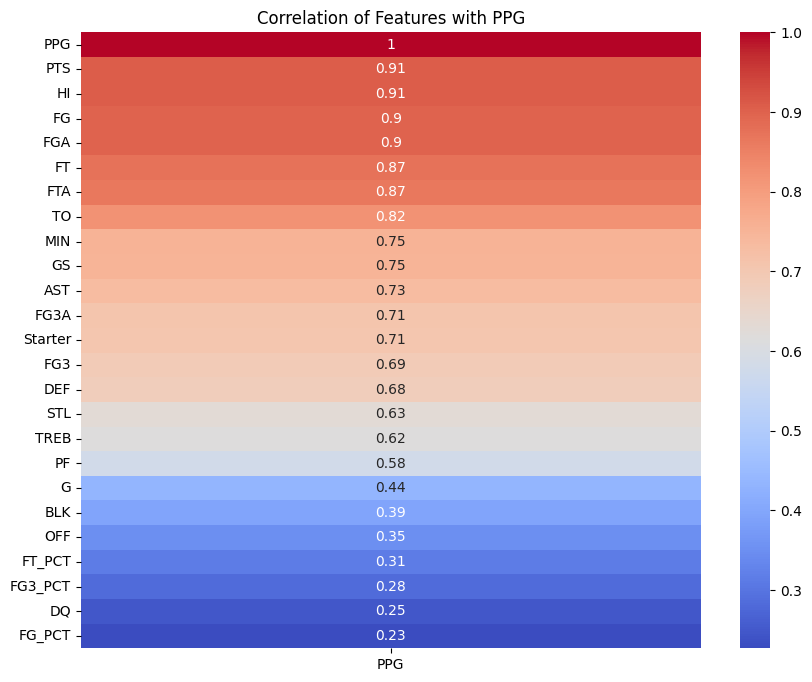

In [ ]:

corr = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr[['PPG']].sort_values(by='PPG', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with PPG')
plt.show()


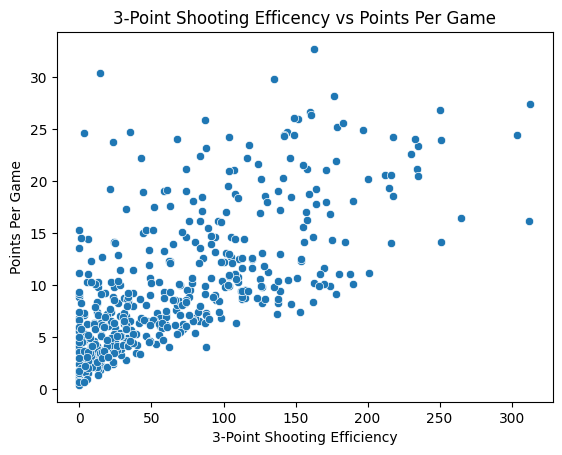

In [ ]:
sns.scatterplot(data=df_cleaned, x='FG3', y='PPG')
plt.title('3-Point Shooting Efficency vs Points Per Game')
plt.xlabel('3-Point Shooting Efficiency')
plt.ylabel('Points Per Game')
plt.show()

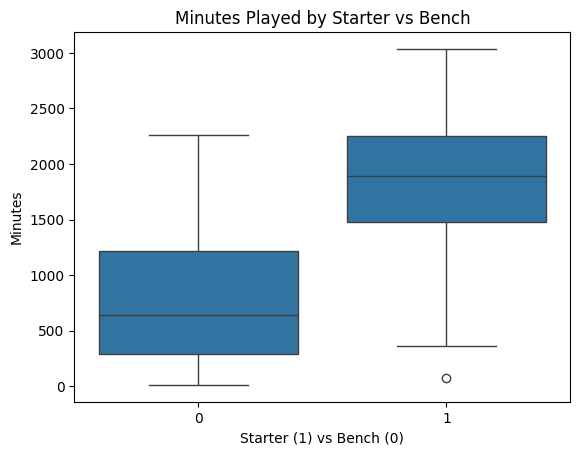

In [ ]:
sns.boxplot(data=df_cleaned, x='Starter', y='MIN')
plt.title('Minutes Played by Starter vs Bench')
plt.xlabel('Starter (1) vs Bench (0)')
plt.ylabel('Minutes')
plt.show()
